<a href="https://colab.research.google.com/github/wallik2/University-stuff/blob/main/Intro_Data_Sci/Homework/HW11_12_classification%2C_regression_and_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Abalone

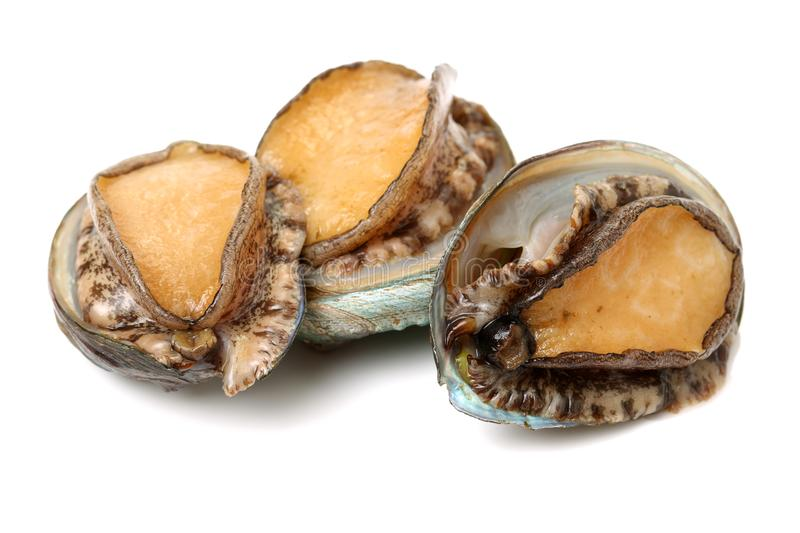

Ref: https://archive.ics.uci.edu/ml/datasets/Abalone





<fieldset>

 <font size="5">Data Set Information:: </font>

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).
</fieldset>



<fieldset>

 <font size="5">Attribute Information: </font>


Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem.

Name / Data Type / Measurement Unit / Description

Sex / nominal / -- / M, F, and I (infant) <br>
Length / continuous / mm / Longest shell measurement <br>
Diameter / continuous / mm / perpendicular to length <br>
Height / continuous / mm / with meat in shell <br>
Whole weight / continuous / grams / whole abalone <br>
Shucked weight / continuous / grams / weight of meat <br>
Viscera weight / continuous / grams / gut weight (after bleeding) <br>
Shell weight / continuous / grams / after being dried <br>
Rings / integer / -- / +1.5 gives the age in years

The readme file contains attribute statistics.

</fieldset>

Our goal : Predicting the sex of each abalone

#@ Coding

In [ ]:

import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [ ]:
abalone_data = pd.read_csv("/content/drive/MyDrive/Data /abalone.data",header=None)

abalone_data.columns = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weigh','Shell weight','Rings']

### 1. Data Exploration

In [ ]:
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weigh,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
abalone_data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weigh     0
Shell weight      0
Rings             0
dtype: int64

In [ ]:
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weigh,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


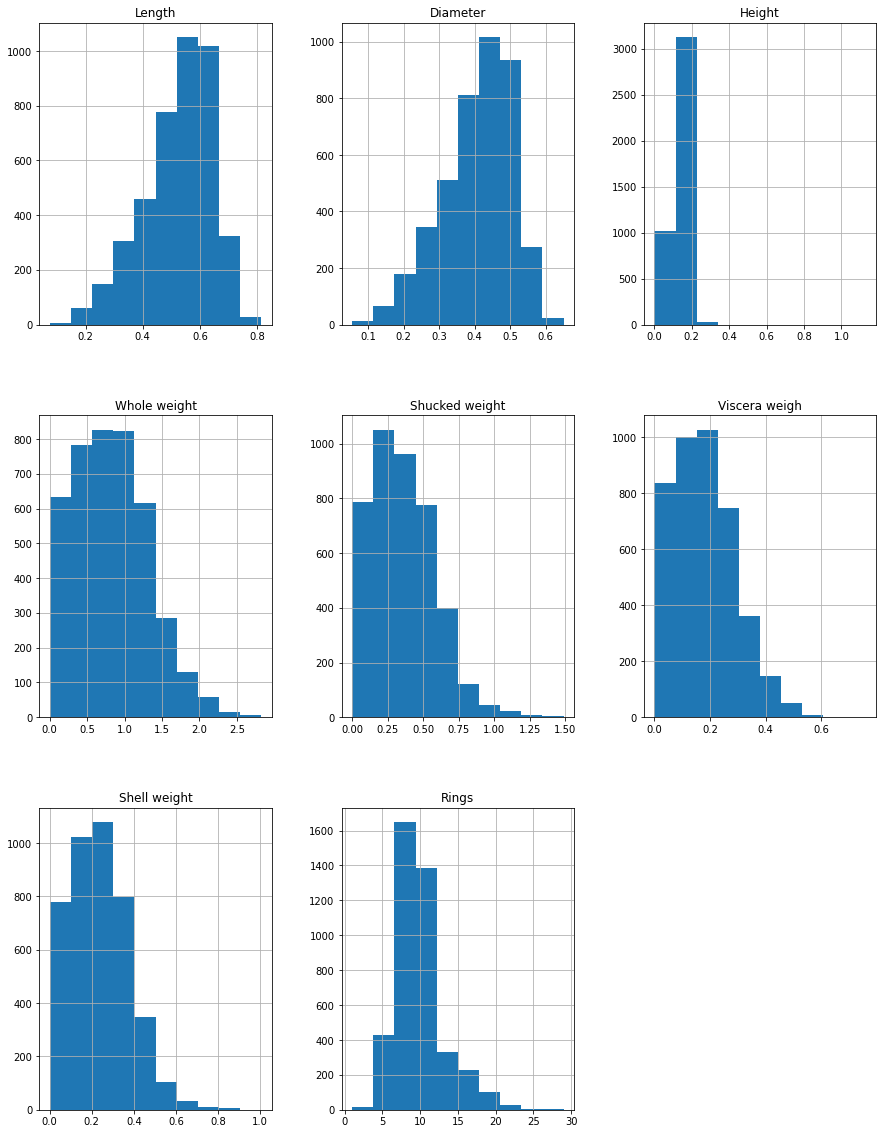

In [ ]:
abalone_data.hist(bins=10, figsize= (15,20))

plt.show()

#The distribution is acceptable to be standardized, since it closely follow normal distribution (even mostly are skewed)

### 2. Data Preparation

In [ ]:
# split training & testing data

from sklearn.model_selection import train_test_split

In [ ]:
train_set, test_set = train_test_split(abalone_data, test_size=0.2, random_state=42) 

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [ ]:
X = train_set.iloc[:,1:] #Except sex
y = train_set.iloc[:,0] #Sex

In [ ]:
X.reset_index(drop=True,inplace=True); y.reset_index(drop=True,inplace=True)

In [ ]:
#X

In [ ]:
#y

In [ ]:
scaler = StandardScaler()

X_tr = scaler.fit_transform(X)

X_tr



array([[ 0.21017452,  0.36972535, -0.34795017, ..., -0.40512998,
        -0.21213236,  0.32909808],
       [-0.41944448, -0.5423862 , -0.93608206, ..., -0.82093157,
        -0.71241871, -0.60639542],
       [-1.84658088, -1.85988065, -1.64184034, ..., -1.34639511,
        -1.39137875, -0.91822659],
       ...,
       [-0.12562228, -0.13700329, -0.34795017, ..., -0.43254547,
        -0.36936522,  0.32909808],
       [ 0.42004752,  0.57241681, -0.46557654, ...,  0.34422673,
        -0.03345867, -0.29456425],
       [ 0.58794593,  0.67376253,  0.47543449, ...,  0.45845793,
         0.22383145, -1.23005776]])

In [ ]:
X.columns 

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weigh', 'Shell weight', 'Rings'],
      dtype='object')

In [ ]:
X_tr = pd.DataFrame(X_tr)

train_set_tr = X_tr.join(y)

train_set_tr.columns = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weigh','Shell weight','Rings','Sex']

In [ ]:
train_set_tr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weigh,Shell weight,Rings,Sex
0,0.210175,0.369725,-0.347950,-0.323164,-0.325407,-0.405130,-0.212132,0.329098,I
1,-0.419444,-0.542386,-0.936082,-0.665985,-0.480126,-0.820932,-0.712419,-0.606395,I
2,-1.846581,-1.859881,-1.641840,-1.388250,-1.354628,-1.346395,-1.391379,-0.918227,F
3,-2.098428,-2.113245,-1.759467,-1.453355,-1.363597,-1.533734,-1.462848,-0.918227,I
4,-0.251546,-0.289022,-0.112697,-0.409632,-0.437522,-0.350299,-0.176398,0.640929,M
...,...,...,...,...,...,...,...,...,...
3336,-0.293521,-0.086330,-0.583203,-0.532723,-0.468915,-0.441684,-0.676684,-0.294564,F
3337,1.217565,1.433855,1.181193,1.138658,0.815929,1.120999,1.145788,0.640929,F
3338,-0.125622,-0.137003,-0.347950,-0.509325,-0.522730,-0.432545,-0.369365,0.329098,M
3339,0.420048,0.572417,-0.465577,0.453016,0.697087,0.344227,-0.033459,-0.294564,M




---



### 3. Model trainIng data

- Model1: Softmax Regression (Multinomial Logistic regression)<br>
- Model2: Support Vector Classifier <br>
- Model3: K-nearest neighbor <br>
- Model4: Random forest classifier 

In [ ]:
# Set Criteria first

def perf_score(score):
  
  score *= 100

  if score == 100:
    return("Perfect or overfitting?")

  elif score >= 98:
    return("Flawless")

  elif score >= 95:
    return("Outstanding")
  
  elif score >= 90:
    return("Excellent")
  
  elif score >= 85:
    return("Great")
  
  elif score >= 80:
    return("Good")
  
  elif score >= 70:
    return("Normal")

  else:
    return("Not acceptable")

In [ ]:
# Must do K-Fold Cross Validation first (Splitting the training set to validation set and a smaller training set)

from sklearn.model_selection import cross_val_predict



---



 <font size="5"> 1) Softmax Regression  </font>

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

In [ ]:
X = train_set_tr.iloc[:,:-1]
y = train_set_tr.iloc[:,-1]

In [ ]:
Logistic_R = LogisticRegression(penalty='l2',random_state=0, multi_class='multinomial')

#Using penalty l1 (to reduce bias)

> Evaluation (f1 score)


In [ ]:
y_pred = cross_val_predict(Logistic_R, X, y, cv=3)

y_pred

array(['I', 'I', 'I', ..., 'I', 'M', 'M'], dtype=object)

In [ ]:
from sklearn.metrics import f1_score

accuracy = f1_score(y.to_numpy(), y_pred,average='micro')

print('The Accuracy of Logistic Regresion is ',accuracy)

print("\nThe performance is {}".format(perf_score(accuracy)))

The Accuracy of Logistic Regresion is  0.5486381322957199

The performance is Not acceptable


Performance : <font color='Red'>Not Acceptable </font>



---



 <font size="5"> 2) Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

2.1 kernel = rbf

In [ ]:
svm_clf = SVC(kernel='rbf')

In [ ]:
y_pred = cross_val_predict(svm_clf, X, y, cv=3)

y_pred

In [ ]:
accuracy = f1_score(y.to_numpy(), y_pred,average='micro')

print('The Accuracy of Support vector machine classifier is ',accuracy)

print("\nThe performance is {}".format(perf_score(accuracy)))

The Accuracy of Support vector machine classifier is  0.5477401975456451

The performance is Not acceptable


2.2 kernel = linear

In [ ]:
svm_clf = SVC(kernel='linear')

In [ ]:
y_pred = cross_val_predict(svm_clf, X, y, cv=3)

In [ ]:
y_pred

array(['I', 'I', 'I', ..., 'I', 'M', 'M'], dtype=object)

In [ ]:
accuracy = f1_score(y.to_numpy(), y_pred,average='micro')

print('The Accuracy of Support vector machine classifier is ',accuracy)

print("\nThe performance is {}".format(perf_score(accuracy)))

The Accuracy of Support vector machine classifier is  0.5495360670457947

The performance is Not acceptable


2.3 poly (degree3)

In [ ]:
svm_clf = SVC(kernel='poly',degree=3)

In [ ]:
y_pred = cross_val_predict(svm_clf, X, y, cv=3)

In [ ]:
y_pred

array(['M', 'M', 'I', ..., 'M', 'M', 'M'], dtype=object)

In [ ]:
accuracy = f1_score(y.to_numpy(), y_pred,average='micro')

print('The Accuracy of Support vector machine classifier is ',accuracy)

print("\nThe performance is {}".format(perf_score(accuracy)))

The Accuracy of Support vector machine classifier is  0.507632445375636

The performance is Not acceptable


Kernel = Linear is the best



---



 <font size="5"> 3. K-nearest neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
K_Nearest = KNeighborsClassifier(n_neighbors=5)

y_pred = cross_val_predict(K_Nearest, X, y, cv=3)

In [ ]:
y_pred

array(['I', 'I', 'I', ..., 'F', 'M', 'M'], dtype=object)

In [ ]:
accuracy = f1_score(y.to_numpy(), y_pred,average='micro')

print('The Accuracy of K-Nearest Neightbor is ',accuracy)

print("\nThe performance is {}".format(perf_score(accuracy)))

The Accuracy of K-Nearest Neightbor is  0.5234959592936247

The performance is Not acceptable




---



 <font size="5"> 4. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_clf= RandomForestClassifier(random_state=42)

y_pred = cross_val_predict(forest_clf, X, y, cv=3)

y_pred

array(['I', 'I', 'I', ..., 'F', 'M', 'M'], dtype=object)

In [ ]:
accuracy = f1_score(y.to_numpy(), y_pred,average='micro')

print('The Accuracy of Random forest classifier is ',accuracy)

print("\nThe performance is {}".format(perf_score(accuracy)))

The Accuracy of Random forest classifier is  0.5489374438790782

The performance is Not acceptable




---



1 st place: Support vector Classifier [Linear kernel] (0.5495)<br>
2 nd place: Random forest classifier (0.5489)<br>
3 rd place: Softmax Regression (0.5486)

- So we pick Support vector Classifier to do fine tune hyperparameters

### 4. Fine Tuning

In [ ]:
svm_clf = SVC(kernel='linear')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Min_samples_leaf= [1, 2, 4]
#Min_samples_split= [2, 5, 10]
#Max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]

In [ ]:
random_grid = [
    {'C': list(np.arange(0.5,5.1,0.1))}],'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']}]


svm_clf = SVC(kernel='linear',random_state=42)



In [ ]:
random_search = RandomizedSearchCV(svm_clf, random_grid, cv=5, n_iter=12,
                          scoring='f1_micro',
                          return_train_score = True)

In [ ]:
random_search.fit(X, y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='linear', max_iter=-1,
                                 probability=False, random_state=42,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=12, n_jobs=None,
                   param_distributions=[{'C': [0.5, 0.6, 0...
                                               2.0999999999999996,
                                               2.1999999999999997, 2.3,
                                               2.3999999999999995,
                                               2.4999999999999996,
                                               2.5999999999999996,
                                               2.699999999999

In [ ]:
random_search.best_params_

{'C': 2.3}

In [ ]:
random_search.best_estimator_

SVC(C=2.3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# {'bootstrap': True, 'max_features': 'auto', 'n_estimators': 170}